In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguedashteamshotlocations
from nba_api.stats.endpoints import shotchartdetail
teams = teams.get_teams()

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch



ja_id = next((x for x in players.get_players() if x.get("full_name") == "Ja Morant"), None).get("id")

gamelog_ja = pd.concat(playergamelog.PlayerGameLog(player_id=ja_id, season=SeasonAll.all).get_data_frames())
gamelog_ja["GAME_DATE"] = pd.to_datetime(gamelog_ja["GAME_DATE"], format="%b %d, %Y")
gamelog_ja = gamelog_ja.query("GAME_DATE.dt.year in [2021, 2023]")

C:\Users\Chetan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.DataFrame(data=gamelog_ja)
df[['WL','FGA','FG_PCT']]
colors = {'L':'lightcoral', 'W':'darkcyan'}
df.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

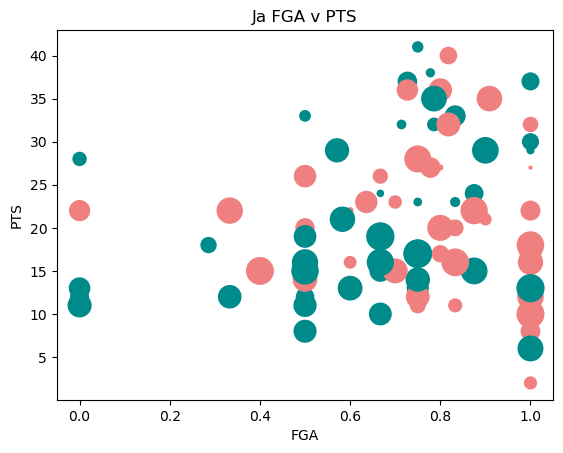

In [10]:
plt.scatter(df['FT_PCT'],df['PTS'],c=df['WL'].map(colors),s = [2*2*n for n in range(len(df['PTS']))])
plt.xlabel("FGA")
plt.ylabel("PTS")
plt.title("Ja FGA v PTS")
plt.show()

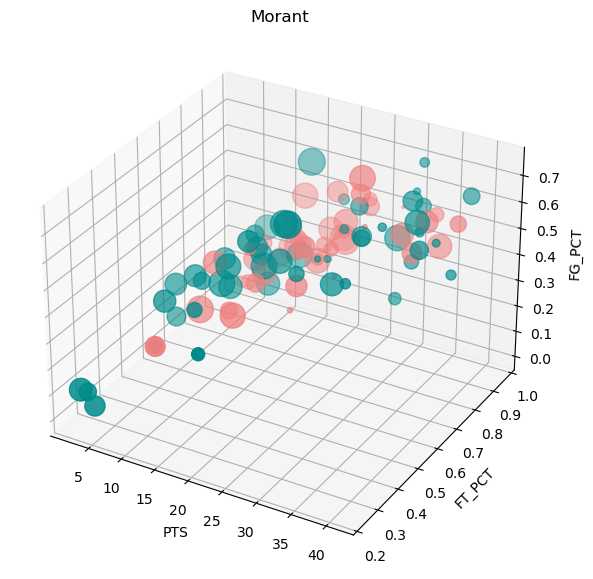

In [11]:
z = df['FG_PCT']
x = df['PTS']
y = df['FT_PCT']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = df['WL'].map(colors),s = [2*2*n for n in range(len(df['PTS']))])
plt.title("Morant")
plt.xlabel("PTS")
plt.ylabel("FT_PCT")
plt.ylim(0.2,1.0)
ax.set_zlabel('FG_PCT')
# show plot
plt.show()